In [10]:

%matplotlib widget
import sys; sys.path.insert(0, '../..') # add parent folder path where lib folder is
from scipy.spatial.transform import Rotation
from tqdm.notebook import tqdm
# %load_ext autoreload
# %autoreload 2
# from stark_effect_predictions import visualize_3D as viz
from stark_effect_predictions import *
from stark_effect_predictions.pdb_extraction import *
from stark_effect_predictions.visualize_2D import *
from jupyter_jukebox import *

AttributeError: module 'stark_effect_predictions.jones_utils' has no attribute 'stark_gogogo'

In [2]:


xtal_axes = [" A axis:    50.647,    9.967,    3.499", # xtal B
"    B axis:   -11.668,   44.193,   43.010",
"    C axis:     5.957,  -48.233,   51.176"]

xtal_axes = ["A axis:    51.676,   -0.391,    1.432",
   " B axis:    -0.739,   48.380,   39.887",
    "C axis:    -1.849,  -44.926,   54.457"]
xtal_axes = np.array([y.strip()[8:].strip().split(',') for y in xtal_axes]).astype(np.float)
# yikes /= np.abs(yikes).sum(axis=1)[:,None]
xtal_axes = norm_vectors(xtal_axes)
A_axis = xtal_axes[0][:,None]
B_axis = xtal_axes[1][:,None]
C_axis = xtal_axes[2][:,None]
# A_axis
aligner = Rotation.align_vectors(xtal_axes,np.eye(3))[0].as_matrix()

In [13]:

R = rotation_matrix('x', 30)
mu, dmu = get_dipoles('../PDBs/4EUL/4EUL_uc.pdb',line_names = gfp_line_names,R=None)
mu = R @ aligner @mu[:,:,None]
dmu = R @ aligner @ dmu[:,:,None]

In [14]:
mu

array([[[-0.70956933],
        [ 0.7046274 ],
        [ 0.0034048 ]],

       [[ 0.7430877 ],
        [ 0.49426696],
        [-0.45113284]],

       [[-0.73699958],
        [-0.67510438],
        [-0.03264499]],

       [[ 0.70348121],
        [-0.52378997],
        [ 0.48037304]]])

In [15]:
mu[:,:2,0]

array([[-0.70956933,  0.7046274 ],
       [ 0.7430877 ,  0.49426696],
       [-0.73699958, -0.67510438],
       [ 0.70348121, -0.52378997]])

In [16]:
def reasonable_2D_arrow(x,y,x_final,y_final,color, dashed=True):
    dashes = [1,0]
    if dashed:
        dashes = [5, 2.5]
    plt.plot((x,x_final), (y,y_final),linewidth=3,color=color,dashes=dashes)
    plt.arrow(x,y,x_final - x,y_final - y,head_width=.1,width=0,edgecolor=color,linestyle='dashed',linewidth=0.,facecolor=color)

In [17]:
from matplotlib.ticker import (MultipleLocator, ScalarFormatter,
                               AutoMinorLocator)
fig = plt.figure(figsize=(5,5))
ax = fig.gca()
for i in range(4):
    if mu[i,0,0] <0:
        color = (214/255,39/255,40/255)#'red'
    else:
        color = (31/255,119/255,180/255)#'blue'
    reasonable_2D_arrow(0,0,*mu[i,:2,0][::-1],color=color)
    reasonable_2D_arrow(0,0,*dmu[i,:2,0][::-1],color=color,dashed=False)
ax.spines['left'].set_position('center')
ax.spines['bottom'].set_position('center')

# Eliminate upper and right axes
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')


tick_label_size = 15
offset = .05
# Show ticks in the left and lower axes only
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')
# ax.set_xticks([-.61],minor=True)
ax.set_xticks([-1,-.5,.5,1],minor=False)
ax.set_yticks([-1,-.5,.5,1],minor=False)
ax.annotate(r'X', xy=(.47,1.08), ha='left', va='top', xycoords='axes fraction', fontsize=20)
ax.annotate(r'Y', xy=(1.04, .52), ha='left', va='top', xycoords='axes fraction', fontsize=20)
# plt.xlabel(r'$Y$')
plt.xlim([-1,1])
plt.ylim([-1,1])
plt.tight_layout()
plt.savefig('../../images/2020-05/dipole_orientations_other_rotation.png')

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

In [8]:
plt.close('all')

In [112]:
plt.close('yikes')
fig = plt.figure('yikes')
ax = fig.gca()
ax.spines['left'].set_position('center')
ax.spines['bottom'].set_position('center')

# Eliminate upper and right axes
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')
ax.set_xticks([-.61],minor=True)
ax.set_xticks([-.64],minor=False)
# ax.tick_params(which='both', width=2)
ax.tick_params(which='minor',direction='inout',labeltop=True, labelbottom=True,labelleft=True,length=5,width=1.5)
ax.xaxis.set_minor_formatter(ScalarFormatter())
# Create offset transform by 5 points in x direction
import matplotlib
dx = 3/72.; dy = 20/72. 
offset = matplotlib.transforms.ScaledTranslation(dx, dy, fig.dpi_scale_trans)

# apply offset transform to all x ticklabels.
for label in ax.xaxis.get_minorticklabels():
    label.set_transform(label.get_transform() + offset)
# ax.tick_params( axis='x', which='minor',labeltop=True, length= )
# plt.xticks((-.61, -.74, .2),labels=None, color='k', size=tick_label_size)
# plt.yticks((-.70, -.74, 1),labels=('',''), color='k', size=tick_label_size)
plt.text(.05,-.74,'-.74',fontsize=tick_label_size)
plt.xlim([-1,1])
plt.ylim([-1,1])

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

(-1, 1)

In [88]:
ax.yaxis.set_tick_params??

Signature: ax.yaxis.set_tick_params(which='major', reset=False, **kw)
Source:   
    def set_tick_params(self, which='major', reset=False, **kw):
        """
        Set appearance parameters for ticks, ticklabels, and gridlines.

        For documentation of keyword arguments, see
        :meth:`matplotlib.axes.Axes.tick_params`.
        """
        dicts = []
        if which == 'major' or which == 'both':
            dicts.append(self._major_tick_kw)
        if which == 'minor' or which == 'both':
            dicts.append(self._minor_tick_kw)
        kwtrans = self._translate_tick_kw(kw)

        # this stashes the parameter changes so any new ticks will
        # automatically get them
        for d in dicts:
            if reset:
                d.clear()
            d.update(kwtrans)

        if reset:
            self.reset_ticks()
        else:
            # apply the new kwargs to the existing ticks
            if which == 'major' or which == 'both':
                for tick i

In [18]:
from scipy.stats import special_ortho_group as randR

In [19]:
blarg = randR(3)

In [20]:
blarg.rvs(10)

array([[[ 0.47909504, -0.45451278, -0.75092348],
        [ 0.82791372, -0.05020619,  0.5586038 ],
        [-0.29159357, -0.88932417,  0.35224383]],

       [[ 0.73284448, -0.49607241, -0.46567277],
        [ 0.5063719 , -0.05948388,  0.8602611 ],
        [-0.45445182, -0.86624121,  0.2076047 ]],

       [[ 0.16123305,  0.09788081,  0.98205053],
        [ 0.93144884,  0.31380355, -0.18420201],
        [-0.32620079,  0.94442929, -0.04057546]],

       [[ 0.07078022,  0.99016338, -0.12069236],
        [ 0.99240149, -0.08210991, -0.09163654],
        [-0.10064518, -0.11328923, -0.98845136]],

       [[ 0.36221707, -0.86068635,  0.35779575],
        [-0.86721031, -0.17047196,  0.4678521 ],
        [-0.34167977, -0.47974818, -0.80814393]],

       [[ 0.33039209,  0.47248283,  0.81706857],
        [-0.86004571, -0.20589085,  0.46683009],
        [ 0.38879615, -0.85695328,  0.33833212]],

       [[-0.95199689,  0.15350513, -0.26483599],
        [ 0.26730868,  0.83846552, -0.47489118],
        

In [16]:
%matplotlib inline
from stark_effect_predictions.visualize_3D import *

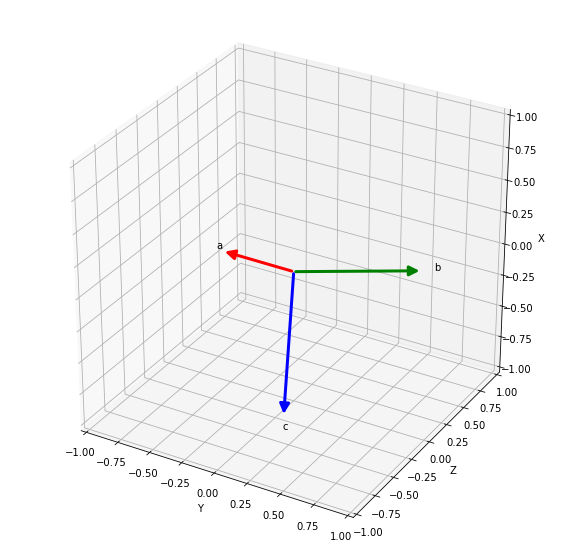

In [23]:
fig, ax = gen_fig()
for i in range(1):

    draw_abc(ax,R=blarg.rvs(1))